In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('train.csv')

In [61]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
df.shape

(1460, 81)

In [63]:
def num_cols(df):
    return df.select_dtypes(include=['float64','int64']).columns

def obj_cols(df):
    return df.select_dtypes(include=['object']).columns

## Handling Missing values

In [64]:
#calculating missing value percentage
null_percent = round(df.loc[:,df.isnull().sum() > 0].isnull().sum()/len(df.index),2) * 100
print("null_percent:\n",null_percent)

#drop columns if null values > 25%
drop_cols = null_percent[null_percent > 25].keys()
print("drop_cols: ",drop_cols)
df = df.drop(drop_cols, "columns")

null_percent:
 LotFrontage      18.0
Alley            94.0
MasVnrType        1.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
Electrical        0.0
FireplaceQu      47.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
PoolQC          100.0
Fence            81.0
MiscFeature      96.0
dtype: float64
drop_cols:  Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [65]:
#columns having missing values
missing_value_df = df.loc[:,df.isnull().sum() > 0]
missing_value_df.isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [66]:
missing_value_df_num = num_cols(missing_value_df)
missing_value_df_num

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [67]:
df1 = df[missing_value_df_num].fillna(0)
df1

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [68]:
missing_value_df_obj = obj_cols(missing_value_df)
missing_value_df_obj

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [69]:
df2 = df[missing_value_df_obj].fillna("NA")
df2

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...
1455,None,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,TA
1456,Stone,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,Unf,TA,TA
1457,None,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1458,None,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,Unf,TA,TA


In [70]:
df = df.drop(columns = missing_value_df.columns)

In [71]:
df = pd.concat([df,df1,df2],axis=1)

In [72]:
#check if any null values exist in our final df
df.loc[:,df.isnull().sum() > 0].isnull().sum()

Series([], dtype: float64)

## Ordinal features

In [73]:
ordinal_col = ['ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
ordinal_col

'''
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes':1, 'no':0}))
for i in ordinal_col:
    print(i)
    print(df[i].value_counts())
    print("-"*50)

'''

df[ordinal_col] = df[ordinal_col].apply(lambda x:x.map({'Ex':9,'Gd':7,'TA':5,'Fa':3,'Po':2,'NA':0}))

In [74]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,7,5,No,GLQ,Unf,SBrkr,Attchd,RFn,5,5
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,7,5,Gd,ALQ,Unf,SBrkr,Attchd,RFn,5,5
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,7,5,Mn,GLQ,Unf,SBrkr,Attchd,RFn,5,5
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,5,7,No,ALQ,Unf,SBrkr,Detchd,Unf,5,5
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,7,5,Av,GLQ,Unf,SBrkr,Attchd,RFn,5,5


In [75]:
df.shape

(1460, 76)

## Categorical features

In [76]:
df_obj_cols = obj_cols(df)
print("categorical cols: \n", df_obj_cols)

categorical cols: 
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'Foundation', 'Heating', 'CentralAir',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition', 'MasVnrType',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageFinish'],
      dtype='object')


In [77]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df[df_obj_cols], drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [78]:
df_dummies.shape

(1460, 178)

In [79]:
df.drop(columns=df_obj_cols,inplace=True)

In [80]:
df = pd.concat([df,df_dummies],axis=1)

In [81]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterCond,BsmtFinSF1,BsmtFinSF2,...,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,1,60,8450,7,5,2003,2003,5,706,0,...,1,1,0,0,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,5,978,0,...,1,1,0,0,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,5,486,0,...,1,1,0,0,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,5,216,0,...,1,0,0,0,0,1,0,0,0,1
4,5,60,14260,8,5,2000,2000,5,655,0,...,1,1,0,0,0,0,0,0,1,0


## Handling Irrelavant Features

In [82]:
df.drop(columns=['Id'],inplace=True)

In [83]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'Electrical_SBrkr', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=222)

## Creating X and y

In [84]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [85]:
num_vars =list(num_cols(X))

for i in df_dummies.columns:
    if i in num_vars:
        num_vars.remove(i)

print(num_vars)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond']


## Feature Scaling

In [86]:
from sklearn.preprocessing import MinMaxScaler

#1. Instantiate an object
scaler = MinMaxScaler()

#2. fit on data
#scaler.fit
X[num_vars] = scaler.fit_transform(df[num_vars])
X.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.043080,0.566591,0.571918,0.719332,0.581096,0.452544,0.078604,0.031580,0.242826,...,0.913699,0.595890,0.013014,0.060274,0.006164,0.265068,0.055479,0.055479,0.289041,0.414384
std,0.248827,0.046653,0.153666,0.139100,0.218862,0.344090,0.099788,0.080811,0.109443,0.189155,...,0.280905,0.490887,0.113372,0.238075,0.078298,0.441521,0.228992,0.228992,0.453472,0.492784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029229,0.444444,0.500000,0.594203,0.283333,0.428571,0.000000,0.000000,0.095462,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.176471,0.038227,0.555556,0.500000,0.731884,0.733333,0.428571,0.067948,0.000000,0.204409,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.294118,0.048150,0.666667,0.625000,0.927536,0.900000,0.428571,0.126196,0.000000,0.345890,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train-test split

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size = 0.2, random_state=100)

## Model Building

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### a. Feature selecton using RFE

In [89]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 20)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 56),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 8),
 ('YearBuilt', False, 9),
 ('YearRemodAdd', False, 184),
 ('ExterCond', False, 52),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 31),
 ('BsmtUnfSF', False, 32),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 145),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 12),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 121),
 ('BsmtHalfBath', False, 192),
 ('FullBath', False, 186),
 ('HalfBath', False, 185),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 14),
 ('TotRmsAbvGrd', False, 41),
 ('Fireplaces', False, 117),
 ('GarageCars', False, 30),
 ('GarageArea', False, 50),
 ('WoodDeckSF', False, 158),
 ('OpenPorchSF', False, 93),
 ('EnclosedPorch', False, 144),
 ('3SsnPorch', False, 64),
 ('ScreenPorch', False, 129),
 ('PoolArea', False, 3),
 ('MiscVal', False, 91),
 ('MoSold', False, 167),
 ('YrSold', False, 187),
 ('LotF

In [90]:
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'BsmtQual', 'Condition2_PosN',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Heating_OthW', 'Functional_Sev',
       'BsmtFinType1_NA'],
      dtype='object')

In [91]:
# Features not selected
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterCond',
       'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'Electrical_SBrkr', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=201)

In [92]:
#updating X_train and X_test
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### b. Building model using selected features

In [93]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

def my_lr_model(X_train_sm,y_train):
    lr = sm.OLS(y_train,X_train_sm)
    lr_model = lr.fit()
    #lr_model.params
    #lr_model.summary()
    return (X_train_sm,lr_model)

### c. Handling Multicollinearity - Dropping features with high P-values (>0.05) and high VIF values

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def multicollinearity_check(X_train,lm):
    X_train = X_train.loc[:,X_train.columns != "const"]
    var_features = pd.DataFrame()
    var_features['Features'] = X_train.columns
    

    var_features['P-values'] = [(lm.pvalues[var_features['Features'][i]]) for i in range(var_features.shape[0])]
    var_features['P-values'] = round(var_features['P-values'],2)

    var_features['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    var_features['VIF'] = round(var_features['VIF'],2)

    var_features = var_features.sort_values(by = ["P-values",'VIF'], ascending = False)
    print(var_features)
    
    
def drop_feature(X_train_sm,feature_col):
    X_train_sm.drop(columns=[feature_col],inplace=True, axis=1)
    print("Features available : ",X_train_sm.columns,"\n")

In [95]:
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)

            Features  P-values     VIF
6          GrLivArea      0.14  748.62
4           1stFlrSF      0.00  410.95
5           2ndFlrSF      0.00  143.36
10  RoofMatl_CompShg      0.00   54.84
3        TotalBsmtSF      0.00   44.30
8           BsmtQual      0.00   40.87
1        OverallQual      0.00   40.31
7       KitchenAbvGr      0.00   28.29
2         BsmtFinSF1      0.00    2.87
19   BsmtFinType1_NA      0.00    2.36
0            LotArea      0.00    2.21
14  RoofMatl_Tar&Grv      0.00    1.45
16  RoofMatl_WdShngl      0.00    1.30
15  RoofMatl_WdShake      0.00    1.24
18    Functional_Sev      0.00    1.21
13     RoofMatl_Roll      0.00    1.10
11  RoofMatl_Membran      0.00    1.07
9    Condition2_PosN      0.00    1.05
12    RoofMatl_Metal      0.00    1.05
17      Heating_OthW      0.00    1.02


In [96]:
# GrLivArea has pvalue > 0.5 and vif is also very high

drop_feature(X_train_sm,feature_col="GrLivArea")
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)

Features available :  Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'BsmtQual', 'Condition2_PosN',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Heating_OthW', 'Functional_Sev',
       'BsmtFinType1_NA'],
      dtype='object') 

            Features  P-values    VIF
9   RoofMatl_CompShg       0.0  54.50
3        TotalBsmtSF       0.0  44.26
7           BsmtQual       0.0  40.81
1        OverallQual       0.0  40.15
6       KitchenAbvGr       0.0  28.29
4           1stFlrSF       0.0  28.20
2         BsmtFinSF1       0.0   2.86
5           2ndFlrSF       0.0   2.49
18   BsmtFinType1_NA       0.0   2.35
0            LotArea       0.0   2.21
13  RoofMatl_Tar&Grv       0.0   1.45
15  RoofMatl_WdShngl       0.0   1.30
14  RoofMatl_WdShake       0.0   1.24
17    Functional_Sev       0.0   1.21
12     RoofMatl_Ro

In [97]:
drop_feature(X_train_sm,feature_col="RoofMatl_CompShg")
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)

Features available :  Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'BsmtQual', 'Condition2_PosN',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Heating_OthW', 'Functional_Sev', 'BsmtFinType1_NA'],
      dtype='object') 

            Features  P-values    VIF
11     RoofMatl_Roll      0.91   1.01
12  RoofMatl_Tar&Grv      0.68   1.22
9   RoofMatl_Membran      0.49   1.01
10    RoofMatl_Metal      0.38   1.01
3        TotalBsmtSF      0.12  44.21
13  RoofMatl_WdShake      0.11   1.05
1        OverallQual      0.00  36.65
7           BsmtQual      0.00  34.50
4           1stFlrSF      0.00  27.83
6       KitchenAbvGr      0.00  11.66
2         BsmtFinSF1      0.00   2.85
5           2ndFlrSF      0.00   2.38
17   BsmtFinType1_NA      0.00   2.32
0            LotArea      0.00   2.18
16    Functional_Sev      0.00   1.21
8    Co

In [98]:
drop_feature(X_train_sm,feature_col="RoofMatl_Roll")
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)

Features available :  Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'BsmtQual', 'Condition2_PosN',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW',
       'Functional_Sev', 'BsmtFinType1_NA'],
      dtype='object') 

            Features  P-values    VIF
11  RoofMatl_Tar&Grv      0.68   1.22
9   RoofMatl_Membran      0.49   1.01
10    RoofMatl_Metal      0.38   1.01
3        TotalBsmtSF      0.12  44.20
12  RoofMatl_WdShake      0.11   1.05
1        OverallQual      0.00  36.62
7           BsmtQual      0.00  34.46
4           1stFlrSF      0.00  27.82
6       KitchenAbvGr      0.00  11.54
2         BsmtFinSF1      0.00   2.85
5           2ndFlrSF      0.00   2.37
16   BsmtFinType1_NA      0.00   2.32
0            LotArea      0.00   2.18
15    Functional_Sev      0.00   1.21
8    Condition2_PosN      0.00   1.05
13  RoofMatl_WdShngl    

In [99]:
drop_feature(X_train_sm,feature_col="RoofMatl_Tar&Grv")
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)

Features available :  Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'BsmtQual', 'Condition2_PosN',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Heating_OthW', 'Functional_Sev',
       'BsmtFinType1_NA'],
      dtype='object') 

            Features  P-values    VIF
9   RoofMatl_Membran      0.49   1.01
10    RoofMatl_Metal      0.38   1.01
3        TotalBsmtSF      0.12  44.19
11  RoofMatl_WdShake      0.11   1.05
1        OverallQual      0.00  36.55
7           BsmtQual      0.00  34.39
4           1stFlrSF      0.00  27.81
6       KitchenAbvGr      0.00  11.54
2         BsmtFinSF1      0.00   2.85
5           2ndFlrSF      0.00   2.37
15   BsmtFinType1_NA      0.00   2.31
0            LotArea      0.00   2.17
8    Condition2_PosN      0.00   1.05
12  RoofMatl_WdShngl      0.00   1.04
13      Heating_OthW      0.00   1.01
14    Functional_Sev      0.00   1.01


In [100]:
drop_feature(X_train_sm,feature_col="RoofMatl_Membran")
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)

Features available :  Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'BsmtQual', 'Condition2_PosN',
       'RoofMatl_Metal', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Heating_OthW', 'Functional_Sev', 'BsmtFinType1_NA'],
      dtype='object') 

            Features  P-values    VIF
9     RoofMatl_Metal      0.38   1.01
3        TotalBsmtSF      0.12  44.19
10  RoofMatl_WdShake      0.11   1.05
1        OverallQual      0.00  36.53
7           BsmtQual      0.00  34.39
4           1stFlrSF      0.00  27.80
6       KitchenAbvGr      0.00  11.53
2         BsmtFinSF1      0.00   2.84
5           2ndFlrSF      0.00   2.37
14   BsmtFinType1_NA      0.00   2.31
0            LotArea      0.00   2.15
8    Condition2_PosN      0.00   1.05
11  RoofMatl_WdShngl      0.00   1.04
12      Heating_OthW      0.00   1.01
13    Functional_Sev      0.00   1.01


In [101]:
drop_feature(X_train_sm,feature_col="RoofMatl_Metal")
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)

Features available :  Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'BsmtQual', 'Condition2_PosN',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW',
       'Functional_Sev', 'BsmtFinType1_NA'],
      dtype='object') 

            Features  P-values    VIF
3        TotalBsmtSF      0.12  44.18
9   RoofMatl_WdShake      0.11   1.05
1        OverallQual      0.00  36.46
7           BsmtQual      0.00  34.35
4           1stFlrSF      0.00  27.78
6       KitchenAbvGr      0.00  11.53
2         BsmtFinSF1      0.00   2.84
5           2ndFlrSF      0.00   2.36
13   BsmtFinType1_NA      0.00   2.31
0            LotArea      0.00   2.15
8    Condition2_PosN      0.00   1.05
10  RoofMatl_WdShngl      0.00   1.04
11      Heating_OthW      0.00   1.01
12    Functional_Sev      0.00   1.01


In [102]:
drop_feature(X_train_sm,feature_col="TotalBsmtSF")
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)

Features available :  Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF',
       'KitchenAbvGr', 'BsmtQual', 'Condition2_PosN', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Heating_OthW', 'Functional_Sev',
       'BsmtFinType1_NA'],
      dtype='object') 

            Features  P-values    VIF
8   RoofMatl_WdShake      0.06   1.02
1        OverallQual      0.00  35.76
6           BsmtQual      0.00  32.79
3           1stFlrSF      0.00  11.38
5       KitchenAbvGr      0.00  11.35
2         BsmtFinSF1      0.00   2.68
4           2ndFlrSF      0.00   2.29
0            LotArea      0.00   2.14
12   BsmtFinType1_NA      0.00   1.74
7    Condition2_PosN      0.00   1.05
9   RoofMatl_WdShngl      0.00   1.04
10      Heating_OthW      0.00   1.01
11    Functional_Sev      0.00   1.01


In [103]:
drop_feature(X_train_sm,feature_col="RoofMatl_WdShake")
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)

Features available :  Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF',
       'KitchenAbvGr', 'BsmtQual', 'Condition2_PosN', 'RoofMatl_WdShngl',
       'Heating_OthW', 'Functional_Sev', 'BsmtFinType1_NA'],
      dtype='object') 

            Features  P-values    VIF
1        OverallQual       0.0  35.73
6           BsmtQual       0.0  32.79
5       KitchenAbvGr       0.0  11.32
3           1stFlrSF       0.0  11.25
2         BsmtFinSF1       0.0   2.68
4           2ndFlrSF       0.0   2.29
0            LotArea       0.0   2.14
11   BsmtFinType1_NA       0.0   1.74
7    Condition2_PosN       0.0   1.05
8   RoofMatl_WdShngl       0.0   1.04
9       Heating_OthW       0.0   1.01
10    Functional_Sev       0.0   1.01


In [104]:
'''
drop_feature(X_train_sm,feature_col="OverallQual")
X_train_sm, lr_model = my_lr_model(X_train_sm,y_train)
multicollinearity_check(X_train_sm,lr_model)
'''


'\ndrop_feature(X_train_sm,feature_col="OverallQual")\nX_train_sm, lr_model = my_lr_model(X_train_sm,y_train)\nmulticollinearity_check(X_train_sm,lr_model)\n'

 ## Model Evaluation - Regression Metrics (MSE, R2_score) 

In [131]:
from sklearn.metrics import mean_squared_error, r2_score
def regression_metrics(y,y_pred,val):
    mse = mean_squared_error(y, y_pred)
    r_square = r2_score(y, y_pred)
    print(f"For {val} data :")
    print("-"*50)
    print("mse: ",mse)
    print("r_square: ",r_square)
    
    residual = y - y_pred

    p = sns.distplot(residual,kde=True)
    p = plt.title(f'Normality of error terms/residuals - {val} data')
    plt.xlabel(f"Residual - {val} data")
    plt.show()
    
    sns.residplot(residual,y)
    plt.title(f"Homoscedasticity - residuals constant variance check - {val} data")
    plt.show()
    
    plt.scatter( y_pred , residual)
    plt.axhline(y=0, color='r', linestyle=':')
    plt.title(f"Residuals independence check - {val} data")
    plt.show()
    
    
    

### a. Prediction and evaluation on Train data

For Train data :
--------------------------------------------------
mse:  1283391793.0533676
r_square:  0.7955003833389016


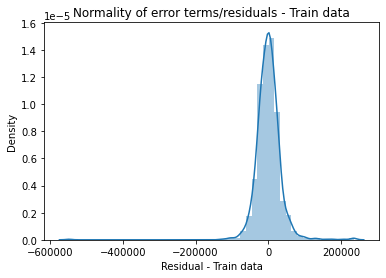

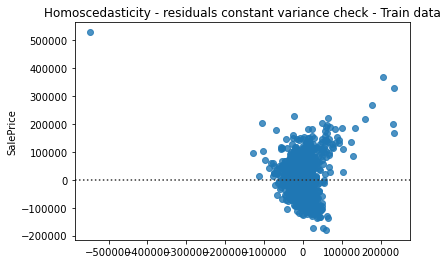

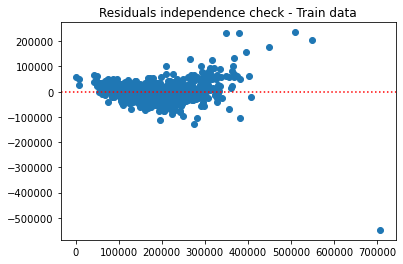

In [132]:
y_pred_train = lr_model.predict(X_train_sm)
regression_metrics(y_train,y_pred_train,"Train")

### b. Prediction and evaluation on Test data

In [133]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]

For Test data :
--------------------------------------------------
mse:  1504111229.4292476
r_square:  0.7660460206388772


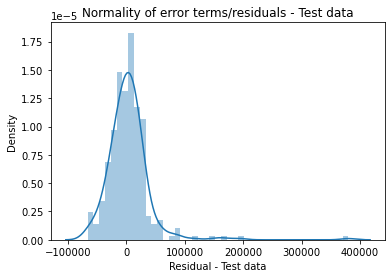

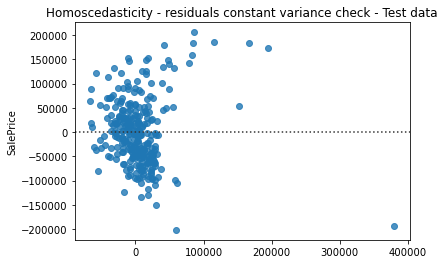

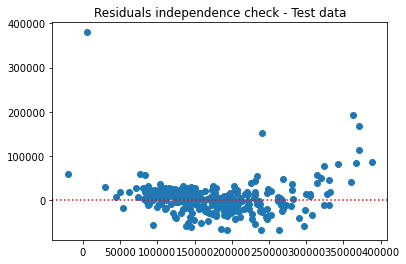

In [134]:
y_pred_test = lr_model.predict(X_test_sm)
regression_metrics(y_test,y_pred_test,"Test")